In [1]:
import pandas as pd
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import networkx as nx
from tensorflow import keras
from datetime import datetime

In [2]:
m = 2
xs = [i * m for i in range(50)]
c = 50

In [3]:
ms = [m for _ in range(50)]
cs = [c for _ in range(50)]

In [4]:
ys = [m * x + c for x in xs]

In [5]:
data = {
    'ms': ms,
    'xs': xs,
    'cs': cs,
    'ys': ys
}

df = pd.DataFrame(data=data)
df.head(5)

,ms,xs,cs,ys
0,2,0,50,50
1,2,2,50,54
2,2,4,50,58
3,2,6,50,62
4,2,8,50,66


In [6]:
X_train = df[['ms', 'xs', 'cs']]
y_train = df['ys']

In [7]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(units=3, input_shape=[3]))
model.add(tf.keras.layers.Dense(units=3, input_shape=[3]))
model.add(tf.keras.layers.Dense(units=1))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 4         
                                                                 
 dense_1 (Dense)             (None, 1)                 2         
                                                                 
 dense_2 (Dense)             (None, 1)                 2         
                                                                 
Total params: 8
Trainable params: 8
Non-trainable params: 0
_________________________________________________________________


In [8]:
# Define the Keras TensorBoard callback.
logdir="logs/fit/" + datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = keras.callbacks.TensorBoard(log_dir=logdir)

In [9]:
model.compile(optimizer=tf.keras.optimizers.Adam(0.5), loss='mean_squared_error')

In [10]:
epochs_hist = model.fit(X_train, y_train, epochs=500, callbacks=[tensorboard_callback])

Epoch 1/500
2/2 [==============================] - 0s 27ms/step - loss: 30025.6348
Epoch 2/500
2/2 [==============================] - 0s 8ms/step - loss: 22867.4629
Epoch 3/500
2/2 [==============================] - 0s 8ms/step - loss: 6344.8516
Epoch 4/500
2/2 [==============================] - 0s 7ms/step - loss: 1939.4476
Epoch 5/500
2/2 [==============================] - 0s 12ms/step - loss: 3117.1338
Epoch 6/500
2/2 [==============================] - 0s 9ms/step - loss: 2631.9229
Epoch 7/500
2/2 [==============================] - 0s 8ms/step - loss: 694.7938
Epoch 8/500
2/2 [==============================] - 0s 9ms/step - loss: 1521.2065
Epoch 9/500
2/2 [==============================] - 0s 8ms/step - loss: 791.0698
Epoch 10/500
2/2 [==============================] - 0s 8ms/step - loss: 1122.3422
Epoch 11/500
2/2 [==============================] - 0s 8ms/step - loss: 199.7489
Epoch 12/500
2/2 [==============================] - 0s 8ms/step - loss: 652.0863
Epoch 13/500
2/2 [=======

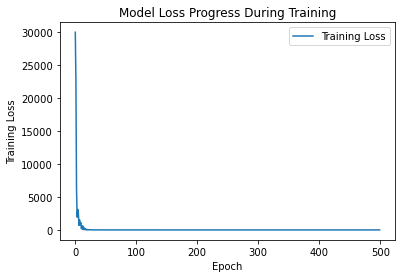

In [11]:
plt.plot(epochs_hist.history['loss'])
plt.title('Model Loss Progress During Training')
plt.xlabel('Epoch')
plt.ylabel('Training Loss')
plt.legend(['Training Loss']);

In [12]:
model.get_weights()

[array([[1.6571571 ],
        [1.5897439 ],
        [0.61978066]], dtype=float32),
 array([1.5652027], dtype=float32),
 array([[1.1372222]], dtype=float32),
 array([-1.2313894], dtype=float32),
 array([[1.1062617]], dtype=float32),
 array([6.23733], dtype=float32)]

In [13]:
for var in model.trainable_variables:
    print(var)

<tf.Variable 'dense/kernel:0' shape=(3, 1) dtype=float32, numpy=
array([[1.6571571 ],
       [1.5897439 ],
       [0.61978066]], dtype=float32)>
<tf.Variable 'dense/bias:0' shape=(1,) dtype=float32, numpy=array([1.5652027], dtype=float32)>
<tf.Variable 'dense_1/kernel:0' shape=(1, 1) dtype=float32, numpy=array([[1.1372222]], dtype=float32)>
<tf.Variable 'dense_1/bias:0' shape=(1,) dtype=float32, numpy=array([-1.2313894], dtype=float32)>
<tf.Variable 'dense_2/kernel:0' shape=(1, 1) dtype=float32, numpy=array([[1.1062617]], dtype=float32)>
<tf.Variable 'dense_2/bias:0' shape=(1,) dtype=float32, numpy=array([6.23733], dtype=float32)>


In [14]:
model.predict(X_train.head(5))

1/1 [==============================] - 0s 46ms/step


array([[50.000076],
       [54.000084],
       [58.00008 ],
       [62.000084],
       [66.000084]], dtype=float32)

In [15]:
weights = model.layers[0].get_weights()[0]
biases = model.layers[0].bias.numpy()
print(weights)
print(biases)

[[1.6571571 ]
 [1.5897439 ]
 [0.61978066]]
[1.5652027]


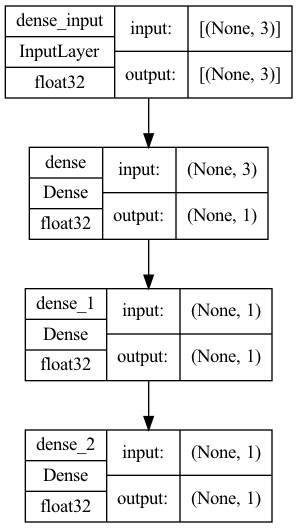

In [17]:
tf.keras.utils.plot_model(
    model,
    to_file='model.png',
    show_shapes=True,
    show_dtype=True,
    show_layer_names=True,
    rankdir='TB',
    expand_nested=False,
    dpi=96,
    layer_range=None,
    show_layer_activations=False
)